## Power plant 

![title](Image.jpeg)

A **power plant** is an industrial facility that generates electricity from a primary energy. Most power plants use one or more generators that convert mechanical energy into electrical energy in order to supply power to the electrical grid for society's electrical needs (AFEWORK, *et al.*, 2020).

A typical power plant requires a primary fuel, in order to produce electricity. Thera are many kinds of primary fuels like coal, natural gas, and radioactive compounds (AFEWORK, *et al.*, 2020). 

Some modern power plants work with a **combined cycle** as a way to reduce primary fuel consumption and optimizate **electricity production**. A **combined cycle** operates with two thermodynamic cycles where the first engine cycle produces a **heated working fluid (the exhaust)** that can be used in a second engine to produces more electricity.

In this project, the dataset was collected from a power plant which operates over 6 years in a combined cycle of a **gas turbine** and a **steam turbine**. Features of this dataset are related with **gas turbine** and **steam turbine** variables. These features are:

* **gas turbine:**

  * **Ambient Temperature (AT)** in the range 1.81°C and 37.11°C;
  * **Ambient Pressure (AP)** in the range 992.89-1033.30 milibar;
  * **Relative Humidity (RH)** in the range 25.56% to 100.16%;
  
* **steam turbine:**

  * **Exhaust Vacuum (V)** in teh range 25.36-81.56 cm Hg;
  
The target of this project is **electrical energy output (PE)** in the range 420.26-495.76MW

In [1]:
#--------------------------------- Dataset manipulation ------------------------#
import pandas as pd

#--------------------------------- Dataset visualization --------------------#
import matplotlib.pyplot as plt
import seaborn as sns

#---------------------------------- Machine learning ------------------------#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


### Dataset importing

In [2]:
df = pd.read_csv("Folds5x2_pp.csv", decimal=",")
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


### Initial information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Features distribution

/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/arley/snap/jupyter/common/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

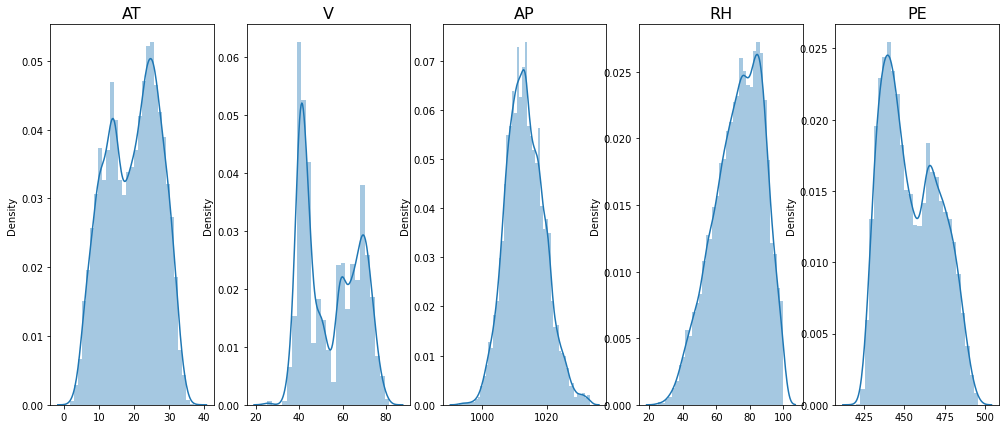

In [5]:
fig, ax = plt.subplots(1, 5, figsize = (17,7))

for i, ax in enumerate(fig.axes):
    
    g = sns.distplot(x = df[df.columns[i]], ax = ax)
    g.set_title(df.columns[i], fontsize =16)

### Correlation among features

Text(0.5, 1.0, 'Correlation Matrix')

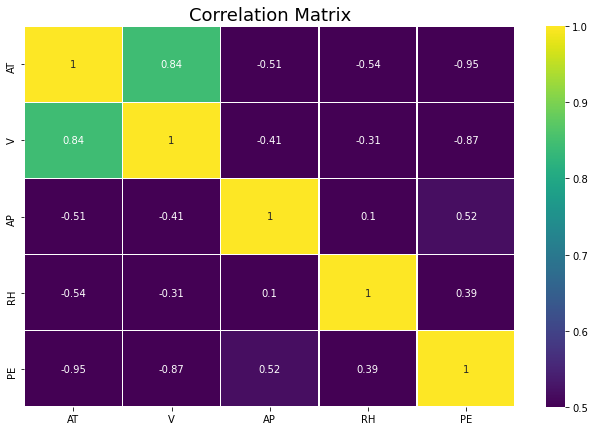

In [6]:
corr = df.corr()

plt.figure(figsize = (11, 7))
g = sns.heatmap(corr, cmap='viridis', annot=True, vmax = 1.0,
            vmin = 0.5, linewidths=.5)
g.set_title("Correlation Matrix", fontsize = 18)

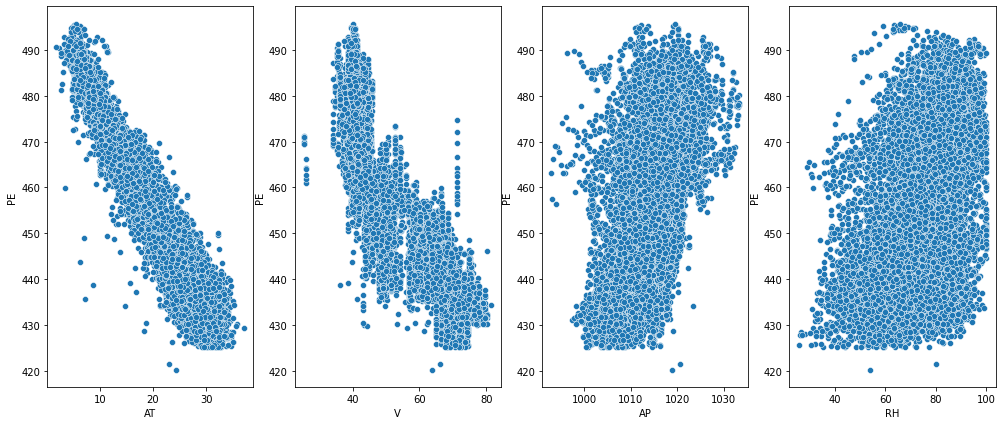

In [8]:
fig, ax = plt.subplots(1, 4, figsize = (17,7))

for i, ax in enumerate(fig.axes):
    
    g = sns.scatterplot(x = df.columns[i], y = "PE", data = df, ax = ax)

* As we can see, the ambient temperature is a very importante feature for electrical production. The relationship between **temperatue** and **electricity (or efficience)** is inversely proportional. This happens because a **gas turbine** operates as a non-ideal Brayton cycle. In a ideal Brayton cycle, the air used during the process is recycled with removal of heat and so improve the efficience. However in a real world, a turbine doesn't have an air recycle process, in order to reduce the temperature. Therefore the **electricity** is affect by ambient temperature in this way. 

* An interesting point is related with **Exhaust Vacuum**. The relation with **electricity** is also inversely proportional that indicates steam turbines are not so much efficient as gas tubines. 

* **Temperature** has some outliers (for exemple below 10°C, there are some low values of **electricity**) that we should remove. This points might be related with mechanical problems on power plant, etc.

### Outliers removal (Temperature)

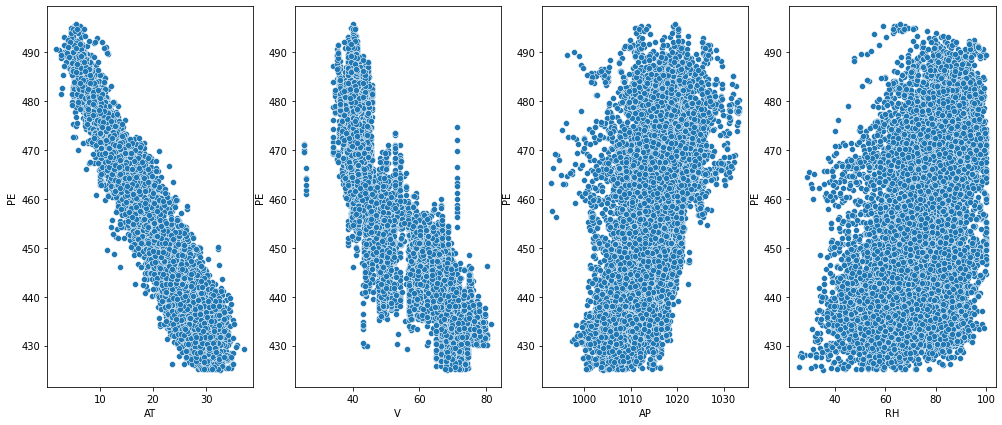

In [9]:
#--------------------------------------------- Filter 1 -------------------------------------#
ft_AT_10 = df["AT"] >= 10
ft_PE_460 = df["PE"] > 460

#--------------------------------------------- Filter 2 -------------------------------------#
ft_AT_30 = df["AT"] >= 30
ft_PE_425 = df["PE"] > 425

#--------------------------------------------- Filter 3 -------------------------------------#
ft_AT_19 = df["AT"] >= 19
ft_PE_440 = df["PE"] > 440

new_df = df[(ft_AT_10 | ft_PE_460) & (ft_AT_30 | ft_PE_425) & (ft_AT_19 | ft_PE_440)]

fig, ax = plt.subplots(1, 4, figsize = (17,7))

for i, ax in enumerate(fig.axes):
    
    g = sns.scatterplot(x = df.columns[i], y = "PE", data = new_df, ax = ax)

### Outliers removal (Ehxaust)

/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


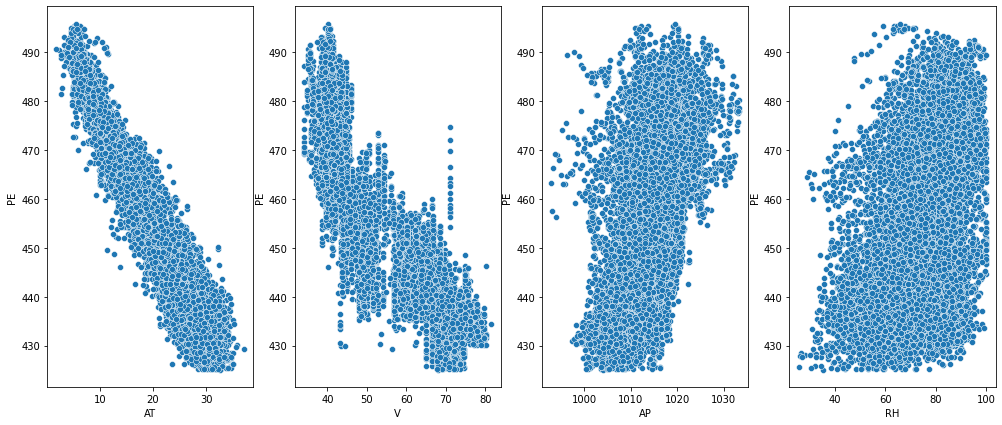

In [10]:
#--------------------------------------------- Filter 1 -------------------------------------#
ft_V_30 = df["V"] >= 30
ft_PE_475 = df["PE"] > 475


new_df2 = new_df[(ft_V_30)]

fig, ax = plt.subplots(1, 4, figsize = (17,7))

for i, ax in enumerate(fig.axes):
    
    g = sns.scatterplot(x = df.columns[i], y = "PE", data = new_df2, ax = ax)

### Machine learning (Linear regression)

In [11]:
#--------------------Splitting train and test dataset--------------------------#
features = new_df2.drop(columns = ["PE"])
target = new_df2["PE"]
X_train, X_test, Y_train, Y_test= train_test_split(features, target,
                                                   test_size= 0.2, random_state= 101)

#------------------------------- Model adjust -----------------------------------#
reg = LinearRegression()
model = reg.fit(X_train, Y_train)

#------------------------- Train dataset prediction -----------------------------#
pred_train = model.predict(X_train)

#-------------------------- Test dataset prediction -----------------------------#
pred_test = model.predict(X_test)


#---------------------------- R²(train and test) --------------------------------#
R_train = r2_score(Y_train, pred_train)
R_test = r2_score(Y_test, pred_test)

#--------------------------- RMSE (train and test) -----------------------------#
RMSE_train = mean_squared_error(Y_train, pred_train, squared = False)
RMSE_test = mean_squared_error(Y_test, pred_test, squared = False)

#--------------------------- MAE (treino e teste) -----------------------------#
MAE_train = mean_absolute_error(Y_train, pred_train)
MAE_test = mean_absolute_error(Y_test, pred_test)

print("R² train dataset: ", R_train)
print("RMSE train dataset: ", RMSE_train )
print("MAE train dataset: ", MAE_train )
print("")
print("R² test dataset: ", R_test)
print("RMSE test dataset: ", RMSE_test )
print("MAE test dataset: ", MAE_test )

R² train dataset:  0.9321186609077822
RMSE train dataset:  4.430463801431077
MAE train dataset:  3.5862962711079103

R² test dataset:  0.9353634178244388
RMSE test dataset:  4.399711088285375
MAE test dataset:  3.619166371583641


* What is observed here, $ R²$ for both cases (train and test) are above 90% and are almost the same. This is a good indicator of how good this model is to explain the variability of target;

* Additional metrics were also used to evaluate the linear regression model: **RMSE** and **MAE**. These two metrics are good to error analysis. As smaller these parameters, better its model adjust. 

* Another point is the RMSE and MAE results proximity to evaluate **error variance**. When these values are near, their indicates less error's variance. As we can see on the results, this difference is quite low. For a huge difference (MAE < 2x RMSE, for example) this might indicate the presence of outliers.

### Checking Error distribution

Text(0.5, 1.0, 'Error_Test')

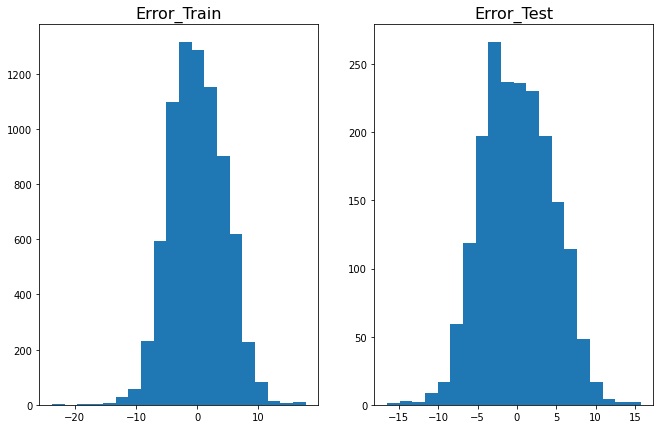

In [12]:
Error_train = Y_train - pred_train
Error_test = Y_test - pred_test

fig, ax = plt.subplots(1, 2, figsize = (11, 7))

ax[0].hist(Error_train, bins = 20)
ax[1].hist(Error_test, bins = 20)

ax[0].set_title("Error_Train", fontsize = 16)
ax[1].set_title("Error_Test", fontsize = 16)

Another important result is the error distribution. In order to make valid inferences from regression, the residuals of the regression should follow a normal distribution with mean 0 and variance $ \sigma^2 $. For train and test dataset the histogram of residuals follow a normal distribution.

### Let's check some other models

### Machine learning (Decision Tree)

In [13]:
#------------------------------- Model adjust -----------------------------------#
DTR = DecisionTreeRegressor()
model = DTR.fit(X_train, Y_train)

#------------------------- Train dataset prediction -----------------------------#
pred_train = model.predict(X_train)

#-------------------------- Test dataset prediction -----------------------------#
pred_test = model.predict(X_test)


#---------------------------- R²(train and test) --------------------------------#
R_train = r2_score(Y_train, pred_train)
R_test = r2_score(Y_test, pred_test)

#--------------------------- RMSE (train and test) -----------------------------#
RMSE_train = mean_squared_error(Y_train, pred_train, squared = False)
RMSE_test = mean_squared_error(Y_test, pred_test, squared = False)

#--------------------------- MAE (treino e teste) -----------------------------#
MAE_train = mean_absolute_error(Y_train, pred_train)
MAE_test = mean_absolute_error(Y_test, pred_test)

print("R² train dataset: ", R_train)
print("RMSE train dataset: ", RMSE_train )
print("MAE train dataset: ", MAE_train )
print("")
print("R² test dataset: ", R_test)
print("RMSE test dataset: ", RMSE_test )
print("MAE test dataset: ", MAE_test )

R² train dataset:  1.0
RMSE train dataset:  0.0
MAE train dataset:  0.0

R² test dataset:  0.9392948473810542
RMSE test dataset:  4.263809026855691
MAE test dataset:  2.968627553693034


### Machine learning (Random Forest)

In [14]:
#------------------------------- Model adjust -----------------------------------#
RFR = RandomForestRegressor(random_state = 0)
model = RFR.fit(X_train, Y_train)

#------------------------- Train dataset prediction -----------------------------#
pred_train = model.predict(X_train)

#-------------------------- Test dataset prediction -----------------------------#
pred_test = model.predict(X_test)


#---------------------------- R²(train and test) --------------------------------#
R_train = r2_score(Y_train, pred_train)
R_test = r2_score(Y_test, pred_test)

#--------------------------- RMSE (train and test) -----------------------------#
RMSE_train = mean_squared_error(Y_train, pred_train, squared = False)
RMSE_test = mean_squared_error(Y_test, pred_test, squared = False)

#--------------------------- MAE (treino e teste) -----------------------------#
MAE_train = mean_absolute_error(Y_train, pred_train)
MAE_test = mean_absolute_error(Y_test, pred_test)

print("R² train dataset: ", R_train)
print("RMSE train dataset: ", RMSE_train )
print("MAE train dataset: ", MAE_train )
print("")
print("R² test dataset: ", R_test)
print("RMSE test dataset: ", RMSE_test )
print("MAE test dataset: ", MAE_test)

R² train dataset:  0.9953294192262646
RMSE train dataset:  1.1621426387781
MAE train dataset:  0.8572711029604421

R² test dataset:  0.9679623660931223
RMSE test dataset:  3.097527596223508
MAE test dataset:  2.3127631220534304


In [15]:
#------------------------------- Model adjust -----------------------------------#
GBR = GradientBoostingRegressor()
model = GBR.fit(X_train, Y_train)

#------------------------- Train dataset prediction -----------------------------#
pred_train = model.predict(X_train)

#-------------------------- Test dataset prediction -----------------------------#
pred_test = model.predict(X_test)


#---------------------------- R²(train and test) --------------------------------#
R_train = r2_score(Y_train, pred_train)
R_test = r2_score(Y_test, pred_test)

#--------------------------- RMSE (train and test) -----------------------------#
RMSE_train = mean_squared_error(Y_train, pred_train, squared = False)
RMSE_test = mean_squared_error(Y_test, pred_test, squared = False)

#--------------------------- MAE (treino e teste) -----------------------------#
MAE_train = mean_absolute_error(Y_train, pred_train)
MAE_test = mean_absolute_error(Y_test, pred_test)

print("R² train dataset: ", R_train)
print("RMSE train dataset: ", RMSE_train )
print("MAE train dataset: ", MAE_train )
print("")
print("R² test dataset: ", R_test)
print("RMSE test dataset: ", RMSE_test )
print("MAE test dataset: ", MAE_test)

R² train dataset:  0.9566906826485551
RMSE train dataset:  3.5388704241206863
MAE train dataset:  2.769574249882828

R² test dataset:  0.9561414232312316
RMSE test dataset:  3.624200653141411
MAE test dataset:  2.855216399234897


### Conclusion

According with model results the best model was **Random Forest** because $ R² $ was the best one. Also this model produced RMSE and MAE with smallest values.

### References:

* **Combined cycle power plant.** https://en.wikipedia.org/wiki/Combined_cycle_power_plant;
* AFEWORK, B.; HANANIA, J.; STENHOUSE, K.; DONEV, J.; Power plant. https://energyeducation.ca/encyclopedia/Power_plant, 2020;
* GUIRARDI, W.; **ANÁLISE DA INFLUÊNCIA DAS CONDIÇÕES DO AR ATMOSFÉRICO NO DESEMPENHO DE TURBINAS A GÁS COM SISTEMAS DE RESFRIAMENTO DO AR DE ENTRADA**, Master's dissertation, 2008;